# Connecting Rods

### Original mage

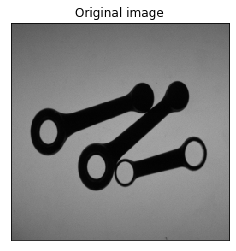

In [74]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))

original_img = cv.imread('testImages/TESI51.BMP', 0)
img = original_img.copy()
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.show()

### Apply Otsu's tresholding

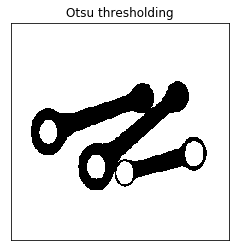

In [76]:
ret, imgf = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

### Median blur

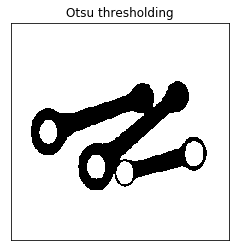

In [72]:
median = cv.medianBlur(imgf, 3)
plt.imshow(median, cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

### Apply dilation operation

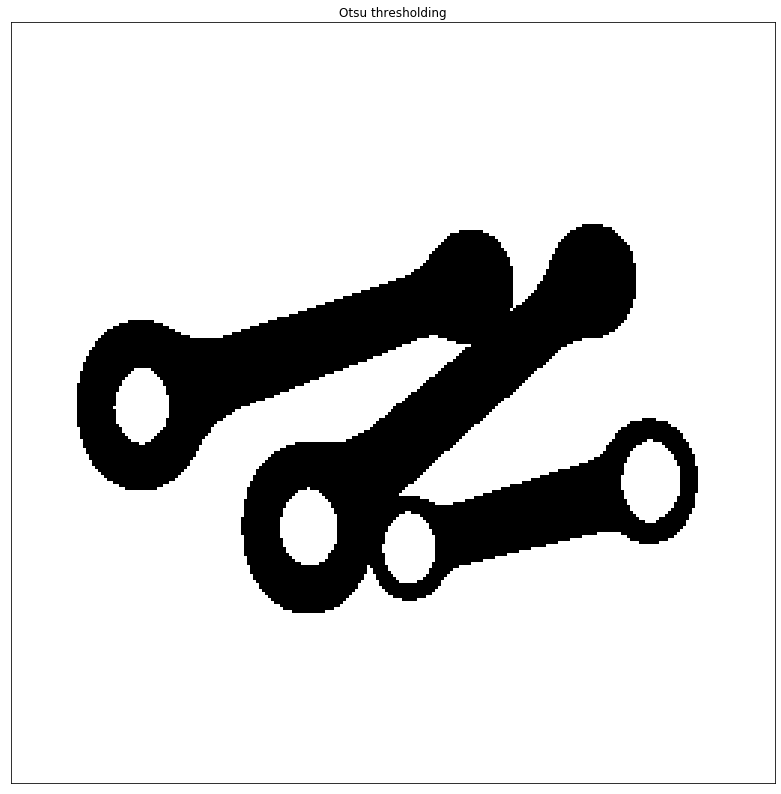

In [73]:
plt.figure(figsize=(14,14))
kernel = np.ones((3,3), np.uint8)   
# here I applied erode to background which is the dilation for foreground
dilated_image = cv.erode(median, kernel, iterations=1)
plt.imshow(dilated_image, cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

### Labeling rods

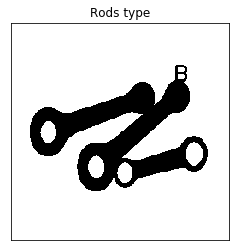

In [563]:
img, contours, hierarchy = cv.findContours(dilated_image.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] == 0 and hierarchy[0, i][2] != -1 and len(contours[i]) >= 72:
        if len(hierarchy[:, np.where(hierarchy[0][:, 3] == i)][0][0]) == 1:
            img = cv.putText(img, 'A', (contours[i][0][0][0], contours[i][0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv.LINE_4)
            plt.imshow(img,cmap = 'gray')
            plt.title('Rods type'), plt.xticks([]), plt.yticks([])
        elif len(hierarchy[:, np.where(hierarchy[0][:, 3] == i)][0][0]) > 1:
            img = cv.putText(img, 'B', (contours[i][0][0][0], contours[i][0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv.LINE_4)
            plt.imshow(img,cmap = 'gray')
            plt.title('Rods type'), plt.xticks([]), plt.yticks([])
            
plt.show()

## Position, orientation, length, width and width at the barycenter Wb 

In [564]:
img = original_img.copy()

Position:  (124.05207061767578, 135.82730102539062) , Orientation:  -13.20108699798584
Length:  200.27989196777344 , Width:  118.2712631225586 , Width at the barycenter:  109.68313598632812
------------------------------------------------------------------------------------------------


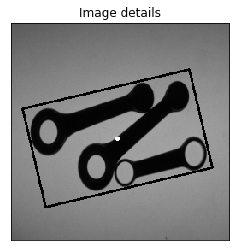

In [565]:
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] == 0 and hierarchy[0, i][2] != -1 and len(contours[i]) >= 72:
        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        img = cv.drawContours(img,[box],0,(0, 255, 0), 2)
        (x, y),(MA, ma),angle = cv.fitEllipse(contours[i])
        print("Position: ", rect[0], ", Orientation: ", rect[2])
        print("Length: ", rect[1][0] if rect[1][0] > rect[1][1] else rect[1][1], ", Width: ", 
              rect[1][1] if rect[1][1] < rect[1][0] else rect[1][0], ", Width at the barycenter: ", MA)
        print("------------------------------------------------------------------------------------------------")
        # draw barycenter
        img = cv.circle(img, center=(round(rect[0][0]), round(rect[0][1])), radius=1, color=(255, 0, 0) , thickness=2) 
        plt.imshow(img, cmap = 'gray')
        plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()

### For each hole, position of the centre and diameter size

In [566]:
img = original_img.copy()

Centre position:  (132.5, 175.5)
Diameter:  16.818836212158203
------------------------------------------------------------------------------------------------
Centre position:  (99.0, 168.5)
Diameter:  18.221694946289062
------------------------------------------------------------------------------------------------
Centre position:  (213.50001525878906, 153.5)
Diameter:  18.814250946044922
------------------------------------------------------------------------------------------------
Centre position:  (43.250003814697266, 128.25001525878906)
Diameter:  17.442657470703125
------------------------------------------------------------------------------------------------


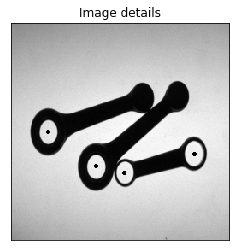

In [567]:
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] > 0 and len(contours[hierarchy[0, i][3]]) >= 72: # if the parent of the hole has a perimeter greater than 72 (basically here I am verifying whether the hole's parent is a rod)
        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        #img = cv.drawContours(img,[box],0,(255, 0, 0), 2)
        (x, y),(MA, ma),angle = cv.fitEllipse(contours[i])
        print("Centre position: ", rect[0])
        #print("Diameter: ", ma)
        print("Diameter: ", MA)
        print("------------------------------------------------------------------------------------------------")
        # draw barycenter
        img = cv.circle(img, center=(round(rect[0][0]), round(rect[0][1])), radius=1, color=(0, 255, 0) , thickness=2) 
        plt.imshow(img, cmap = 'gray')
        plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()

hierarchy[0, i][3] == 0 : if my parent is zero, it means that I'am a rod. <br>
hierarchy[0, i][2] != -1 : if a rod has a first child, it means it is a rod and not a bolt, so it will be analyzed. <br>
len(contours[i]) >= 72 : of the perimeter of the blob took into account is greater than the empirical value 72, it means that it is a rod an not a washers, so it will be analyzed.

max area rondella == 64

min area biella == 80

threshold = (64 + 80) / 2 -> 72

------

max area biella == 256

min area touching bielle == 397

threshold for touching elements: (256 + 397) / 2 -> 326

In [202]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))

original_img = cv.imread('testImages/TESI51.BMP', 0)
img = original_img.copy()
ret, imgf = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

<Figure size 288x288 with 0 Axes>

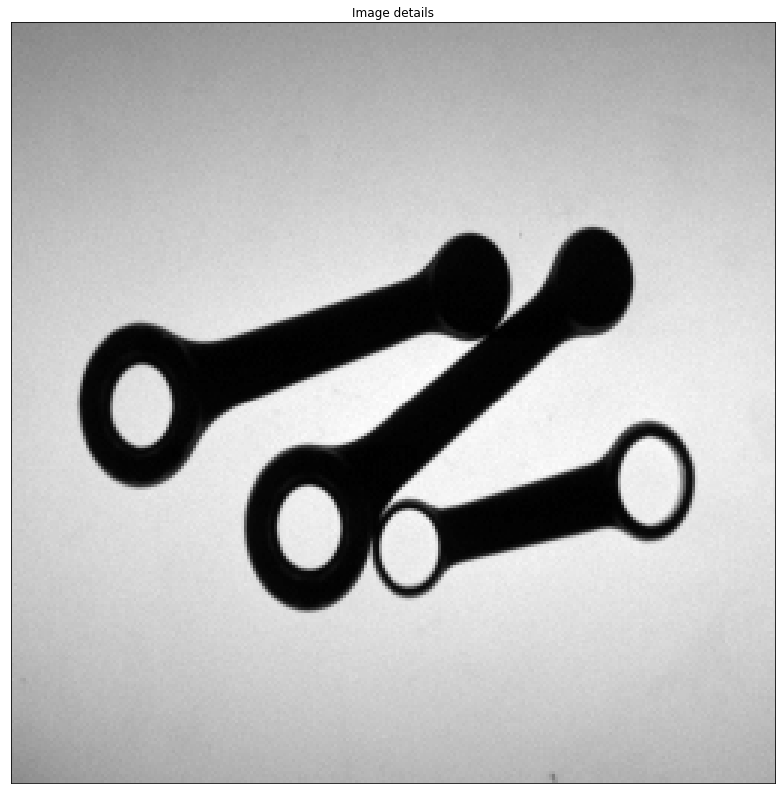

In [203]:
plt.figure(figsize=(14,14))
plt.imshow(img, cmap = 'gray')
plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()

In [204]:
img, contours, hierarchy = cv.findContours(imgf.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [205]:
# after otsu, check whethere there are touching rods

In [206]:
# get the contour index of touching rods
# TODO: handle multiple touching rods using list
sepc = -1
for i in range(len(contours)):
    if(len(contours[i])) >= 256: # there are touching elements
        sepc = i
        break

In [207]:
# TODO: check bounds
if sepc != -1: # if there are touching rods
    collision_points = []
    for i in range(len(contours[sepc])):
        if int(img[contours[sepc][i][0][1] - 1, contours[sepc][i][0][0]]) + int(img[contours[sepc][i][0][1] - 1, contours[sepc][i][0][0] - 1]) + int(img[contours[sepc][i][0][1], contours[sepc][i][0][0] - 1]) + int(img[contours[sepc][i][0][1] + 1, contours[sepc][i][0][0] - 1]) + int(img[contours[sepc][i][0][1] + 1, contours[sepc][i][0][0]]) + int(img[contours[sepc][i][0][1] + 1, contours[sepc][i][0][0] + 1]) + int(img[contours[sepc][i][0][1], contours[sepc][i][0][0] + 1]) + int(img[contours[sepc][i][0][1] - 1, contours[sepc][i][0][0] + 1]) == 255 or int(img[contours[sepc][i][0][1] - 1, contours[sepc][i][0][0]]) + int(img[contours[sepc][i][0][1] - 1, contours[sepc][i][0][0] - 1]) + int(img[contours[sepc][i][0][1], contours[sepc][i][0][0] - 1]) + int(img[contours[sepc][i][0][1] + 1, contours[sepc][i][0][0] - 1]) + int(img[contours[sepc][i][0][1] + 1, contours[sepc][i][0][0]]) + int(img[contours[sepc][i][0][1] + 1, contours[sepc][i][0][0] + 1]) + int(img[contours[sepc][i][0][1], contours[sepc][i][0][0] + 1]) + int(img[contours[sepc][i][0][1] - 1, contours[sepc][i][0][0] + 1]) == 510:
            collision_points.append([contours[sepc][i], False])
       

In [208]:
collision_points

[[array([[125, 163]], dtype=int32), False],
 [array([[120, 175]], dtype=int32), False],
 [array([[157, 106]], dtype=int32), False],
 [array([[164, 100]], dtype=int32), False]]

In [209]:
# calculate euclidean distance

In [210]:
#np.linalg.norm()
from scipy.spatial import distance
import math

In [211]:
for i in range(len(collision_points) - 1):
    distance_from_i_to_j = math.inf
    index_of_j = -1
    if collision_points[i][1] == False: # means that still need to find its miniumum distance point
        for j in range(i + 1, len(collision_points)):
            dst = distance.euclidean(collision_points[i][0][0], collision_points[j][0][0])
            if dst < distance_from_i_to_j and collision_points[j][1] == False:
                distance_from_i_to_j = dst
                index_of_j = j
        # draw line
        cv.line(img,(collision_points[i][0][0][0],collision_points[i][0][0][1]),(collision_points[index_of_j][0][0][0],collision_points[index_of_j][0][0][1]),(255,0, 0),1)
        collision_points[i][1] = True
        collision_points[index_of_j][1] = True

i:  0
j:  1
i:  2
j:  3


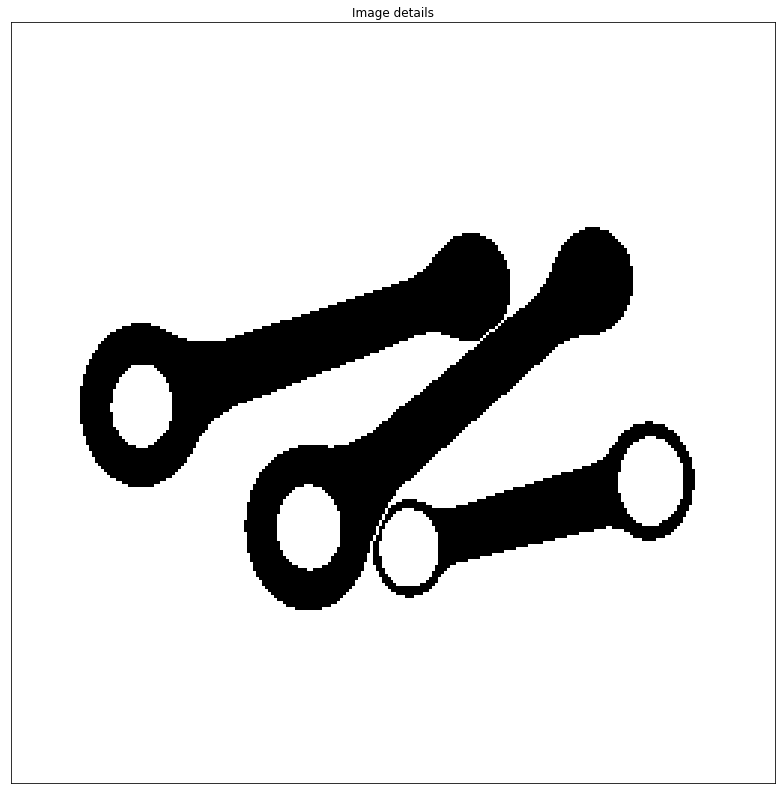

In [201]:
plt.figure(figsize=(14,14))
plt.imshow(img, cmap = 'gray')
plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()

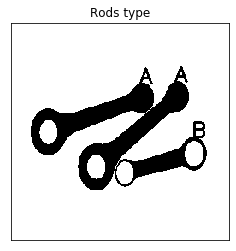

In [212]:
img, contours, hierarchy = cv.findContours(img.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] == 0 and hierarchy[0, i][2] != -1 and len(contours[i]) >= 72:
        if len(hierarchy[:, np.where(hierarchy[0][:, 3] == i)][0][0]) == 1:
            img = cv.putText(img, 'A', (contours[i][0][0][0], contours[i][0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv.LINE_4)
            plt.imshow(img,cmap = 'gray')
            plt.title('Rods type'), plt.xticks([]), plt.yticks([])
        elif len(hierarchy[:, np.where(hierarchy[0][:, 3] == i)][0][0]) > 1:
            img = cv.putText(img, 'B', (contours[i][0][0][0], contours[i][0][0][1]), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv.LINE_4)
            plt.imshow(img,cmap = 'gray')
            plt.title('Rods type'), plt.xticks([]), plt.yticks([])
            
plt.show()

Position:  (174.78578186035156, 165.9202117919922) , Orientation:  -17.987333297729492
Length:  113.52970886230469 , Width:  40.20663833618164 , Width at the barycenter:  35.08451461791992
------------------------------------------------------------------------------------------------
Position:  (92.82138061523438, 105.65370178222656) , Orientation:  -24.205886840820312
Length:  154.52609252929688 , Width:  54.26446533203125 , Width at the barycenter:  45.72482681274414
------------------------------------------------------------------------------------------------
Position:  (140.25, 127.75000762939453) , Orientation:  -45.0
Length:  166.1700897216797 , Width:  49.49747848510742 , Width at the barycenter:  48.14064407348633
------------------------------------------------------------------------------------------------


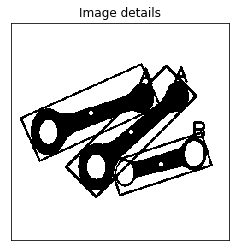

In [213]:
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] == 0 and hierarchy[0, i][2] != -1 and len(contours[i]) >= 72:
        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        img = cv.drawContours(img,[box],0,(0, 255, 0), 2)
        (x, y),(MA, ma),angle = cv.fitEllipse(contours[i])
        print("Position: ", rect[0], ", Orientation: ", rect[2])
        print("Length: ", rect[1][0] if rect[1][0] > rect[1][1] else rect[1][1], ", Width: ", 
              rect[1][1] if rect[1][1] < rect[1][0] else rect[1][0], ", Width at the barycenter: ", MA)
        print("------------------------------------------------------------------------------------------------")
        # draw barycenter
        img = cv.circle(img, center=(round(rect[0][0]), round(rect[0][1])), radius=1, color=(255, 0, 0) , thickness=2) 
        plt.imshow(img, cmap = 'gray')
        plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()

Centre position:  (132.5, 175.5)
Diameter:  19.32396697998047
------------------------------------------------------------------------------------------------
Centre position:  (213.5, 153.5)
Diameter:  21.360126495361328
------------------------------------------------------------------------------------------------
Centre position:  (43.0, 128.5)
Diameter:  19.96916961669922
------------------------------------------------------------------------------------------------
Centre position:  (99.0, 169.0)
Diameter:  20.820850372314453
------------------------------------------------------------------------------------------------


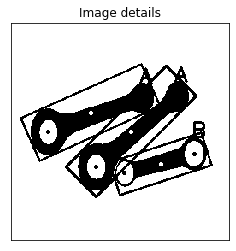

In [214]:
for i in range(hierarchy.shape[1]):
    if hierarchy[0, i][3] > 0 and len(contours[hierarchy[0, i][3]]) >= 72: # if the parent of the hole has a perimeter greater than 72 (basically here I am verifying whether the hole's parent is a rod)
        rect = cv.minAreaRect(contours[i])
        box = cv.boxPoints(rect)
        box = np.int0(box)
        #img = cv.drawContours(img,[box],0,(255, 0, 0), 2)
        (x, y),(MA, ma),angle = cv.fitEllipse(contours[i])
        print("Centre position: ", rect[0])
        #print("Diameter: ", ma)
        print("Diameter: ", MA)
        print("------------------------------------------------------------------------------------------------")
        # draw barycenter
        img = cv.circle(img, center=(round(rect[0][0]), round(rect[0][1])), radius=1, color=(0, 255, 0) , thickness=2) 
        plt.imshow(img, cmap = 'gray')
        plt.title('Image details'), plt.xticks([]), plt.yticks([])
plt.show()